In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1: Fashion MNIST Clothing Classification

Fashion-MNIST is a dataset of Zalando's article images.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.
The Fashion-MNIST dataset was proposed as a more challenging replacement dataset for the MNIST dataset.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_train.csv'
data = pd.read_csv(url)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462745,0.400000,0.40000,0.188235,0.0,0.0,0.003922,0.0,0.0,0.0
3,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003045,0.002876,0.00303,0.002968,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
data.shape

(5000, 785)

In [4]:
y = data.label.to_numpy() # labels 
X = data.iloc[:,1:785].to_numpy() # pixels

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. 
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
This pixel-value is an integer between 0 and 1.

The following figure shows a few images from the fashion-MNIST dataset

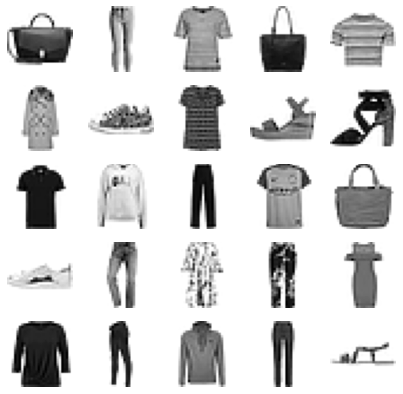

In [5]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap='binary')
    plt.axis('off')    

**Labels:**

| Label | Description |
| :- | -: |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

**The goal** is to use the knn classifier to predict the labels of clothing images.

In [46]:
def knn_classifier(k,X,y,X_new, weights='uniform'):
    from sklearn.metrics import pairwise_distances
    
    # number of datapoints
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # classes and number of classes
    labels = np.unique(y)
    n_classes = len(labels)
    
    # distance matrix
    dist = pairwise_distances(X,X_new)
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=0)[0:k]
    
    y_pred = np.zeros(m_new).astype(int)
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[:,i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[knn[:,i],i]
        else:
            print('weights not recognized: should be uniform or distance')
            return 
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    return y_pred, labels

Split the dataset into training and validation sets.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val=train_test_split(X,y)

Use the validation set to tune-in the parameters of the knn classifier (`k` and `weights`).

Text(0.5, 0, 'k (number of neighbors)')

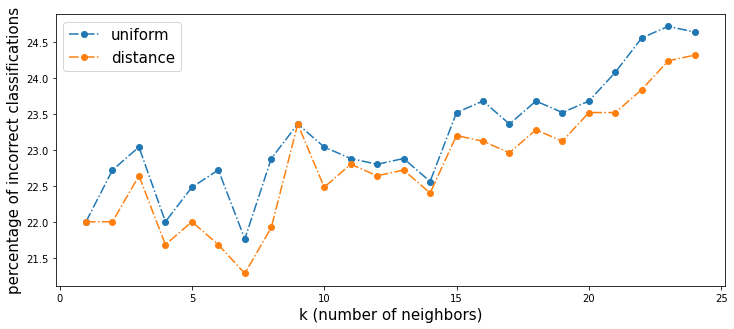

In [9]:
weights = ['uniform', 'distance']
k_list = np.arange(1,25)

plt.figure(figsize=(12,5))

# loop over weight options: uniform, distance
for i in range(len(weights)):
    # initialize percentage of incorrect classifications vector
    pct_incorrect = np.zeros(len(k_list))
    # loop over k values
    for j in range(len(k_list)):
        # knn classifier
        y_val_pred,_ = knn_classifier(k_list[j],
                                      X_train,y_train,X_val,
                                      weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classifications', fontsize=15)
plt.xlabel('k (number of neighbors)', fontsize=15)

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.

In [10]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_test.csv'
test_data = pd.read_csv(url)
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.000015,0.0,0.0,0.000492,0.001569,0.000323,...,0.003306,0.003291,0.003353,0.003383,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000000,0.000000,...,0.001353,0.001261,0.000877,0.000677,0.000723,0.000000,0.000000,0.000031,0.000031,0.0
2,8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.517647,0.823529,0.698039,0.588235,0.000000,0.000000,0.0
4,9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [11]:
y_test = test_data.label.to_numpy() # labels 
X_test = test_data.iloc[:,1:785].to_numpy() # pixels

In [12]:
y_test_pred,labels = knn_classifier(6,X_train,y_train,X_test, weights='distance')

In [13]:
'Confusion matrix'
def confusion_matrix(y,y_pred,labels):
    C = np.zeros((len(labels),len(labels)))
    for i,label_i in enumerate(labels):
        for j,label_j in enumerate(labels):
            C[i,j]=sum(y_pred[y==label_i]==label_j)
    return C
confusion_matrix(y_test,y_test_pred,labels)

array([[160.,   0.,   6.,   6.,   1.,   1.,  21.,   0.,   0.,   0.],
       [  1., 195.,   4.,   5.,   1.,   0.,   2.,   0.,   0.,   0.],
       [  3.,   0., 129.,   0.,  26.,   0.,  43.,   0.,   1.,   0.],
       [ 13.,   3.,   4., 168.,   9.,   0.,  12.,   0.,   0.,   0.],
       [  0.,   1.,  25.,   6., 123.,   0.,  37.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 115.,   0.,  25.,   3.,  27.],
       [ 47.,   1.,  29.,   7.,  24.,   0., 118.,   0.,   2.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   2.,   0., 189.,   1.,  14.],
       [  1.,   0.,   7.,   4.,   3.,   0.,   4.,   0., 163.,   3.],
       [  0.,   0.,   0.,   1.,   1.,   1.,   0.,  12.,   0., 190.]])

## Part 2: The Labeled Faces in the Wild Dataset 

In [14]:
# Run this cell to load the Labeled Faces in the Wild people dataset
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data/255
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

There are 1288 images, and each image has 1850 features. This is because each image is 50x37 pixels, and each feature simply represents one pixel's intensity.

(-0.5, 36.5, 49.5, -0.5)

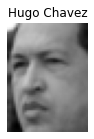

In [15]:
plt.figure(figsize=(2,2))
some_face = X[0]
some_face_image = some_face.reshape(50,37)
plt.imshow(some_face_image,cmap='gray')
plt.title(target_names[y[0]])
plt.axis('off')

The following figure shows a few more images from the *"labeled faces in the wild"* dataset

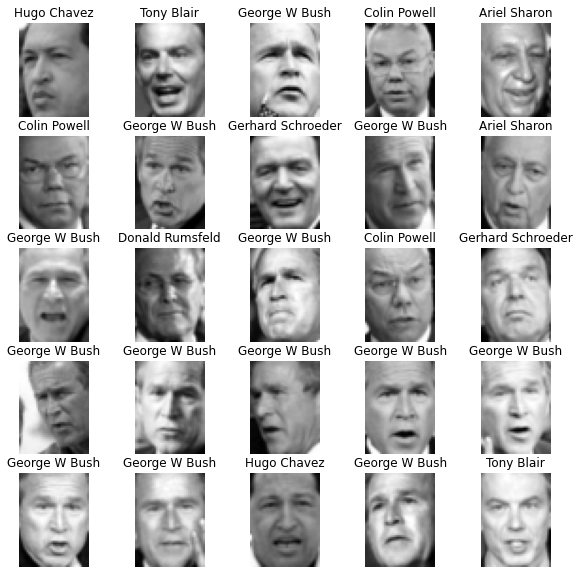

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    face = X[i]
    face_image = face.reshape(50,37)
    plt.subplot(5,5,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.title(target_names[y[i]])
    plt.axis('off')  

**Labels:**

| Label | Description |
| :- | -: |
| 0 | Ariel Sharon |    
| 1 | Colin Powell |       
| 2 | Donald Rumsfeld |      
| 3 | George W Bush |       
| 4 | Gerhard Schroeder |      
| 5 | Hugo Chavez |      
| 6 | Tony Blair |  

**The goal** is to use the softmax classifier to predict the labels of the images.

Split the dataset into training and test sets

In [17]:
X_train, X_val, y_train, y_val=train_test_split(X,y)

Use the training data to fit a softmax regression model

In [18]:
def softmaxregression_GD(X,y,learning_rate,n_epochs):
    
    # one-hot-encoding function
    def one_hot_encoding(v):
        # labels
        labels = np.unique(v)
        # ordinal encoding
        dic_labels = {labels[i]:i for i in range(len(labels))}
        ord_labels = np.array([dic_labels[v[i]] for i in range(len(v))])
        # one-hot encoding
        V = np.zeros((len(v),len(labels)))
        V[np.arange(len(v)),ord_labels] = 1
        return V,labels
    
    # softmax function
    def softmax(X,theta):
        m,n = X.shape
        Y = np.exp(X.dot(theta))
        row_sum = np.sum(Y,axis=1).reshape(-1,1)
        return Y/row_sum
    
    # softmax cost function
    def softmax_cost(X,Y,theta):
        m = X.shape[0]
        P = softmax(X,theta)
        return -np.sum(Y*np.log(P))
    
    m,n = X.shape
    k = len(np.unique(y))
        
    # initialize vector theta
    theta = np.random.randn(n,k)
    
    # initialize cost vector
    cost = np.zeros(n_epochs)
    
    # one-hot encodings
    Y,labels = one_hot_encoding(y)
    
    # gradient descent iterations  
    for i in range(n_epochs):
        gradient = X.T.dot(softmax(X,theta)-Y)
        theta = theta - learning_rate * gradient
        cost[i] = softmax_cost(X,Y,theta)
            

    return theta,cost,labels

In [19]:
def softmax(X,theta):
    m,n = X.shape
    Y = np.exp(X.dot(theta))
    row_sum = np.sum(Y,axis=1).reshape(-1,1)
    return Y/row_sum

In [20]:
def predictor_softmax(X,theta,labels):
    P = softmax(X,theta)
    return labels[np.argmax(P,axis=1)]

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.

In [21]:
theta,cost,labels=softmaxregression_GD(X_test,y_test,learning_rate=.0001,n_epochs=1000)

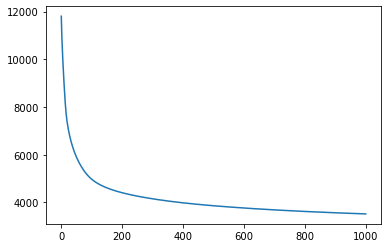

In [22]:
plt.plot(cost)

In [23]:
def predictor_softmax(X,theta,labels):
    P = softmax(X,theta)
    return labels[np.argmax(P,axis=1)]

In [24]:
y_pred = predictor_softmax(X_test,theta,labels)
y_pred

array([6, 6, 9, ..., 4, 2, 9], dtype=int64)

In [25]:
confusion_matrix(y_test,y_pred,labels)

array([[124.,   2.,  10.,  15.,   0.,   1.,  38.,   0.,   4.,   1.],
       [  5., 184.,   5.,  11.,   1.,   1.,   1.,   0.,   0.,   0.],
       [  6.,   2., 120.,   1.,  44.,   2.,  24.,   0.,   3.,   0.],
       [ 17.,   5.,   4., 151.,  11.,   0.,  18.,   0.,   1.,   2.],
       [  3.,   4.,  33.,   5., 118.,   1.,  25.,   0.,   3.,   0.],
       [  1.,   2.,   4.,   2.,   5.,  91.,   3.,  27.,   9.,  26.],
       [ 30.,   4.,  38.,   9.,  33.,   4., 104.,   0.,   5.,   1.],
       [  0.,   0.,   0.,   0.,   0.,  12.,   0., 171.,   2.,  21.],
       [  1.,   1.,   2.,   3.,   4.,   1.,   7.,   4., 160.,   2.],
       [  0.,   2.,   2.,   1.,   0.,  21.,   1.,  17.,   2., 159.]])

In [26]:
100*np.mean(y_pred==y_test)

69.1

## Part 3: The Palmer Archipelago Penguin Data

<img src="cute_penguins.png" alt="Drawing" style="width: 500px;"/>

Art by @allison_horst

In [27]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

This dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica

In [28]:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

The culmen is the upper ridge of a bird’s bill. For this penguin data, the culmen (bill) length and depth are measured as shown below.

<img src="culmen_depth.png" alt="Drawing" style="width: 500px;"/>

Some rows contain missing values (the `NaN` values). We will drop them from the pandas dataframe.

In [29]:
data.dropna(axis=0,inplace=True)

The **goal** is to use the knn classifier to predict the penguin species based on the penguin's mody beasurements 

In [30]:
# target vector (remark: numpy's bincount only works with integers, so we'll map species to (0,1,2))
y = data.species.map({'Adelie': 0, 'Chinstrap' : 1, 'Gentoo' : 2}).to_numpy() 

In [31]:
# feature matrix
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

Shuffle the data

In [32]:
# shuffle the data
m = len(y)
permutation = np.random.permutation(m) 
X = X[permutation]
y = y[permutation]

Split the data into training and validation sets

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

m = len(y_train)

# split data into train and validation sets
X_val, y_val = X_train[3*m//4:m], y_train[3*m//4:m]
X_train, y_train = X_train[0:3*m//4], y_train[0:3*m//4]

Use the validation set to tune-in the parameters of the knn classifier (`k` and `weights`).

Text(0.5, 0, 'k (number of neighbors)')

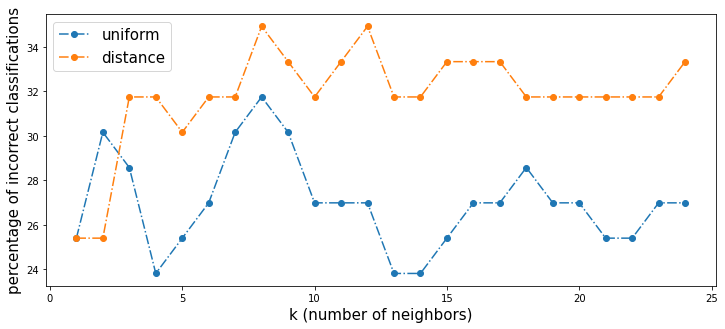

In [34]:
weights = ['uniform', 'distance']
k_list = np.arange(1,25)

plt.figure(figsize=(12,5))
# loop over weight options: uniform, distance
for i in range(len(weights)):
    # initialize percentage of incorrect classifications vector
    pct_incorrect = np.zeros(len(k_list))
    # loop over k values
    for j in range(len(k_list)):
        # knn classifier
        y_val_pred,_ = knn_classifier(k_list[j],
                                      X_train,y_train,X_val,
                                      weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classifications', fontsize=15)
plt.xlabel('k (number of neighbors)', fontsize=15)

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.

In [35]:
y_test_pred,labels = knn_classifier(11,X_train,y_train,X_test, weights='uniform')

In [36]:
'Confusion matrix'
confusion_matrix(y_test,y_test_pred,labels)

array([[30.,  3.,  3.],
       [ 8., 11.,  0.],
       [ 0.,  0., 29.]])

In [37]:
100*np.mean(y_test_pred==y_test)

83.33333333333334

**Scaling the features:** The knn classifier is a distance based algorithm. 
Distance based algorithms are affected by the scale of the features. 
They give higher weightage to features which have higher magnitude (body_mass_g in our case).

We do not want our knn classifier to be affected by the magnitude of the features.
To overcome this problem, we can bring down all the variables to the same scale.

In [38]:
# Scale each feature (column) by its maximum absolute value.
X = X/np.abs(X).max(axis=0)

Use the validation set to tune-in the parameters of the knn classifier (k and weights).

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

m = len(y_train)

# split data into train and validation sets
X_val, y_val = X_train[3*m//4:m], y_train[3*m//4:m]
X_train, y_train = X_train[0:3*m//4], y_train[0:3*m//4]

Text(0.5, 0, 'k (number of neighbors)')

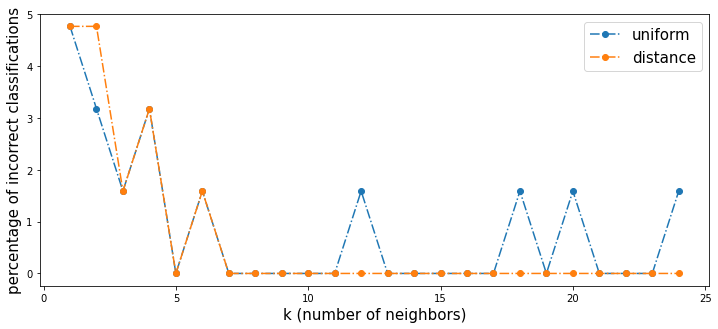

In [40]:
weights = ['uniform', 'distance']
k_list = np.arange(1,25)

plt.figure(figsize=(12,5))
# loop over weight options: uniform, distance
for i in range(len(weights)):
    # initialize percentage of incorrect classifications vector
    pct_incorrect = np.zeros(len(k_list))
    # loop over k values
    for j in range(len(k_list)):
        # knn classifier
        y_val_pred,_ = knn_classifier(k_list[j],
                                      X_train,y_train,X_val,
                                      weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classifications', fontsize=15)
plt.xlabel('k (number of neighbors)', fontsize=15)

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.

In [43]:
y_test_pred,labels = knn_classifier(5,X_train,y_train,X_test, weights='distance')

In [44]:
'Confusion matrix'
confusion_matrix(y_test,y_test_pred,labels)

array([[39.,  0.,  0.],
       [ 1.,  9.,  0.],
       [ 0.,  0., 35.]])

In [45]:
100*np.mean(y_test_pred==y_test)

98.80952380952381